In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov8

/content/drive/MyDrive/Colab Notebooks/yolov8


In [4]:
pwd

'/content/drive/MyDrive/Colab Notebooks/yolov8'

In [5]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
# Load a model which is saved while training base model
model = YOLO('runs/detect/train/weights/best.pt')   # Trained *train model with 100 epochs

In [8]:
!ls runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1719896579.bb99bcd0c250.3238.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch5400.jpg  weights
P_curve.png					    train_batch5401.jpg
PR_curve.png					    train_batch5402.jpg


In [9]:
results = model.predict(source = 'Test30nov/test_112.jpg',  save = True, save_txt=False, conf= 0.75)  # return a list of Results objects


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_112.jpg: 128x224 1 Keyboard, 64.5ms
Speed: 11.1ms preprocess, 64.5ms inference, 840.6ms postprocess per image at shape (1, 3, 128, 224)
Results saved to runs/detect/predict4


In [10]:
image = input("Enter image path")
results = model.predict(image,  project="Predict", name="001",exist_ok=True, save = True, conf= 0.10)

Enter image path/content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_103.jpg

image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_103.jpg: 192x224 1 Keyboard, 81.3ms
Speed: 0.8ms preprocess, 81.3ms inference, 1.4ms postprocess per image at shape (1, 3, 192, 224)
Results saved to Predict/001


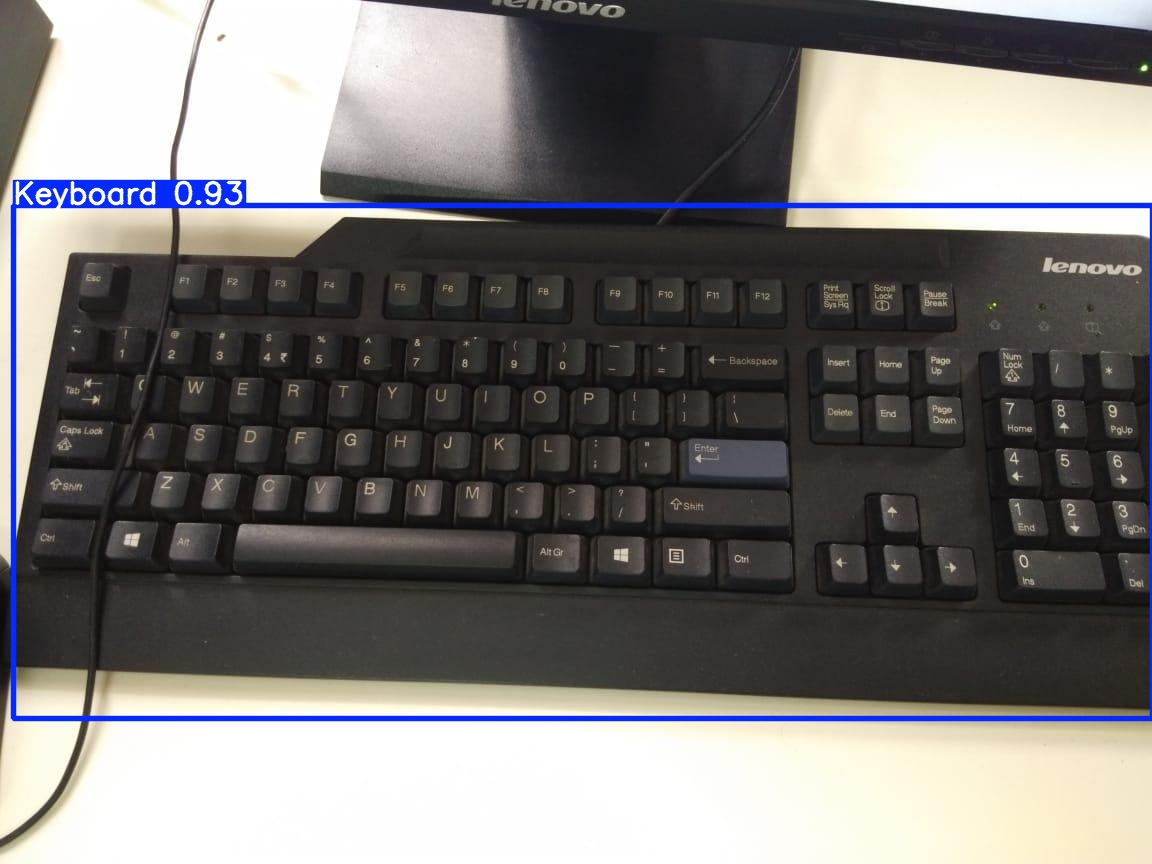

In [11]:
Image(filename='Predict/001/test_103.jpg', width=500)


In [12]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.75 source= Test30nov save= True

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/112 /content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_0.jpg: 224x128 1 Other_category, 97.5ms
image 2/112 /content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_1.jpg: 224x192 1 Other_category, 69.8ms
image 3/112 /content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_10.jpg: 192x224 1 Laptop, 67.6ms
image 4/112 /content/drive/MyDrive/Colab Notebooks/yolov8/Test30nov/test_100.jpg: 128x224 1 Laptop, 65.4ms
image 5/112 /content/drive/MyDrive/

In [13]:
# Validate the model
metrics = model.val() # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.31s/it]


                   all         60         69      0.874      0.877      0.913      0.835
              Keyboard         10         10          1      0.978      0.995      0.938
                 Mouse         11         12          1      0.942      0.995      0.944
                Laptop         10         11      0.685          1      0.925      0.845
                Mobile         10         10      0.961        0.8      0.962      0.914
               Monitor         10         10          1      0.977      0.995      0.963
        Other_category         10         16      0.599      0.562      0.604      0.403
Speed: 0.6ms preprocess, 11.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val3


In [15]:
results1 = model.predict(source = '/content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images', project="Predict", name="Test_pred",exist_ok=True,save = True, save_txt=False, conf= 0.50)  # return a list of Results objects


image 1/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_0.jpg: 224x224 1 Keyboard, 14.0ms
image 2/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_1.jpg: 224x224 1 Keyboard, 11.1ms
image 3/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_2.jpg: 224x224 1 Keyboard, 10.4ms
image 4/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_3.jpg: 224x224 1 Keyboard, 8.6ms
image 5/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_4.jpg: 224x224 1 Keyboard, 7.1ms
image 6/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_5.jpg: 224x224 1 Keyboard, 1 Mouse, 8.1ms
image 7/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/Keyboard_6.jpg: 224x224 (no detections), 7.1ms
image 8/60 /content/drive/MyDrive/Colab Notebooks/yolov8/e_waste_dataset/valid/images/